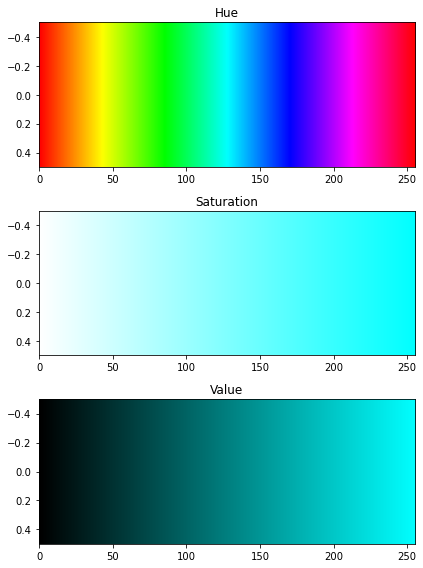

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

# Hue color bar
hsv_hue = np.linspace(0, 1, 256).reshape(1, -1, 1)
hsv_hue_rgb = mcolors.hsv_to_rgb(np.concatenate([hsv_hue, np.ones_like(hsv_hue), np.ones_like(hsv_hue)], 2))
axs[0].imshow(hsv_hue_rgb, aspect='auto')
axs[0].set_title('Hue')

# Saturation color bar
hsv_saturation = np.linspace(0, 1, 256).reshape(1, -1, 1)
hsv_saturation_rgb = mcolors.hsv_to_rgb(np.concatenate([np.ones_like(hsv_saturation) * 0.5, hsv_saturation, np.ones_like(hsv_saturation)], 2))
axs[1].imshow(hsv_saturation_rgb, aspect='auto')
axs[1].set_title('Saturation')

# Value color bar
hsv_value = np.linspace(0, 1, 256).reshape(1, -1, 1)
hsv_value_rgb = mcolors.hsv_to_rgb(np.concatenate([np.ones_like(hsv_value) * 0.5, np.ones_like(hsv_value), hsv_value], 2))
axs[2].imshow(hsv_value_rgb, aspect='auto')
axs[2].set_title('Value')

# Set space between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [13]:
import json
import pandas as pd

CO_NUMS = list(range(1, 18))
EX_NUMS = list(range(1, 18))
co_json_datas = []
ex_json_datas = []
for name in CO_NUMS:
    with open('./CO/' + str(name) + '/data.json', 'r') as json_file:
        data = json.load(json_file)
    co_json_datas.append(data)
for name in EX_NUMS:
    with open('./EX/' + str(name) + '/data.json', 'r') as json_file:
        data = json.load(json_file)
    ex_json_datas.append(data)
output_data = {'Pid': [], 'Group': [],'Mental1': [],'Physical1': [],'Temporal1': [],'Performance1': [],'Effort1': [],'Frustration1': [],
           'Mental2': [], 'Physical2': [],'Temporal2': [],'Performance2': [],'Effort2': [],'Frustration2': []}
for idx, data in enumerate(ex_json_datas):
    output_data['Pid'].append(idx)
    output_data['Group'].append("test")
    output_data['Mental1'].append(data["nasa_1"][0] - 10)
    output_data['Physical1'].append(data["nasa_1"][1] - 10)
    output_data['Temporal1'].append(data["nasa_1"][2] - 10)
    output_data['Performance1'].append(data["nasa_1"][3] - 10)
    output_data['Effort1'].append(data["nasa_1"][4] - 10)
    output_data['Frustration1'].append(data["nasa_1"][5] - 10)
    output_data['Mental2'].append(data["nasa_2"][0] - 10)
    output_data['Physical2'].append(data["nasa_2"][1] - 10)
    output_data['Temporal2'].append(data["nasa_2"][2] - 10)
    output_data['Performance2'].append(data["nasa_2"][3] - 10)
    output_data['Effort2'].append(data["nasa_2"][4] - 10)
    output_data['Frustration2'].append(data["nasa_2"][5] - 10)
for idx, data in enumerate(co_json_datas):
    output_data['Pid'].append(idx + len(EX_NUMS))
    output_data['Group'].append("control")
    output_data['Mental1'].append(data["nasa_1"][0] - 10)
    output_data['Physical1'].append(data["nasa_1"][1] - 10)
    output_data['Temporal1'].append(data["nasa_1"][2] - 10)
    output_data['Performance1'].append(data["nasa_1"][3] - 10)
    output_data['Effort1'].append(data["nasa_1"][4] - 10)
    output_data['Frustration1'].append(data["nasa_1"][5] - 10)
    output_data['Mental2'].append(data["nasa_2"][0] - 10)
    output_data['Physical2'].append(data["nasa_2"][1] - 10)
    output_data['Temporal2'].append(data["nasa_2"][2] - 10)
    output_data['Performance2'].append(data["nasa_2"][3] - 10)
    output_data['Effort2'].append(data["nasa_2"][4] - 10)
    output_data['Frustration2'].append(data["nasa_2"][5] - 10)
from scipy.stats import levene, bartlett
from scipy.stats import mannwhitneyu
import pandas as pd
from scipy.stats import ttest_ind
def diff_analysis(vector1, vector2):
    # 进行Levene方差比较检验
    statistic, p_value_var = levene(vector1, vector2)

    print("Levene's test statistic for variance comparison:", statistic)
    print("P-value for variance comparison:", p_value_var)
    equal_var = None
    # 根据方差比较结果选择t检验方法
    if p_value_var < 0.05:
        ttest_method = 'Mann-Whitney U'
        equal_var = False  # 使用 Mann-Whitney U
    else:
        ttest_method = 'Student'
        equal_var = True   # 使用Student's t-test
    statistic = None
    p_value = None
    # 进行t检验
    if equal_var:
        statistic, p_value = ttest_ind(vector1, vector2, equal_var=equal_var)
    else:
        statistic, p_value = mannwhitneyu(vector1, vector2)
    print(f"The statistical value of t test is STA: {statistic} and p_value: {p_value}")
    alpha = 0.05
    if p_value < alpha:
        print(f"Reject the null hypothesis using {ttest_method}'s t-test: There is a significant difference between the two vectors.")
    else:
        print(f"Fail to reject the null hypothesis using {ttest_method}'s t-test: There is no significant difference between the two vectors.")    

pd.DataFrame(output_data).to_csv("NASA.csv", index=False)
content = ["Mental load", "Physical load", "Temporal load", "Performance", "Effort", "Frustration"]
for i in range(1, 3):
    print(i)
    for idx, item in enumerate(content):
        array_ex = []
        array_co = []
        for v1, v2 in zip(ex_json_datas, co_json_datas):
            array_ex.append(v1["nasa_" + str(i)][idx])
            array_co.append(v2["nasa_" + str(i)][idx])
        print(item)
        diff_analysis(array_ex, array_co)
        print("\n")
        

1
Mental load
Levene's test statistic for variance comparison: 3.6025328787140776
P-value for variance comparison: 0.06674354789222002
The statistical value of t test is STA: 1.8343425032272966 and p_value: 0.07591637401532152
Fail to reject the null hypothesis using Student's t-test: There is no significant difference between the two vectors.


Physical load
Levene's test statistic for variance comparison: 0.27832087406555484
P-value for variance comparison: 0.6014430012595204
The statistical value of t test is STA: 0.4930455583938811 and p_value: 0.6253469770801159
Fail to reject the null hypothesis using Student's t-test: There is no significant difference between the two vectors.


Temporal load
Levene's test statistic for variance comparison: 1.039476652379878
P-value for variance comparison: 0.31558986543350165
The statistical value of t test is STA: 0.9215904893531877 and p_value: 0.36363857427299473
Fail to reject the null hypothesis using Student's t-test: There is no signific

  group1 group2  meandiff   p-adj    lower    upper  reject
0      A      B       2.5  0.8195 -14.3017  19.3017   False
1      A      C      -1.5  0.9279 -18.3017  15.3017   False
2      B      C      -4.0  0.6285 -20.8017  12.8017   False


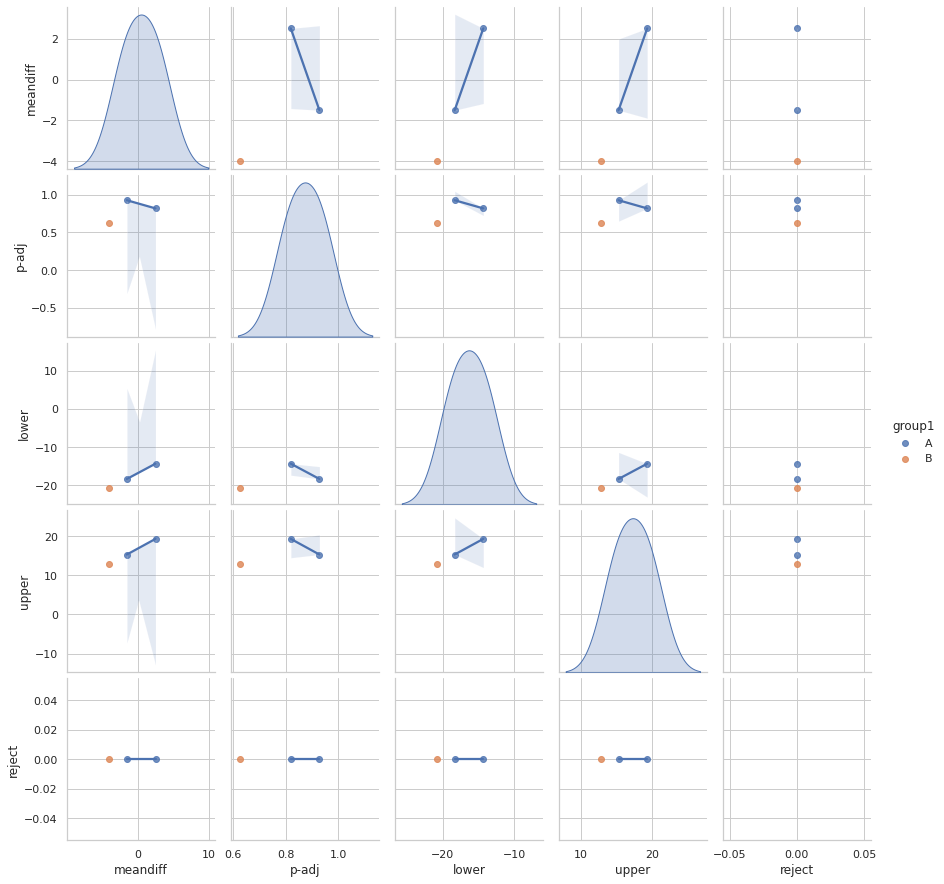

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 创建一个示例数据框（替换成您自己的数据）
data = pd.DataFrame({'Group': ['A', 'A', 'B', 'B', 'C', 'C'],
                     'Values': [10, 15, 12, 18, 8, 14]})

# 运行Tukey HSD测试
tukey_results = pairwise_tukeyhsd(data['Values'], data['Group'])

# 将结果转换为数据框
comparison_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])

# 打印Tukey HSD的结果
print(comparison_df)

# 绘制Tukey HSD的结果
sns.set(style="whitegrid")
sns.pairplot(comparison_df, hue='group1', kind='reg')
# 显示图表
plt.grid(True)
plt.show()